# Visualizing distributions: histograms and cumulative distributions

> Create a dual distribution visualization of the desired column in a `DataFrame`. A histogram shows the distribution of observations, and bottom chart displays them all showing their cumulative distribution. Optionally, you can set `hover_name` to show the actual value of each observation on hover.

In [ ]:
#| default_exp ecdf

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import advertools as adv
import pandas as pd
import plotly.express as px

The `ecdf` function is a thin wrapper for the `plotly.express` function of the same name. It adds a few minor options to it.

It can be used to visualize how numeric variables are distributed, both using a histogram, as well the cumulative distribution (ecdf: [empirical cumulative distribution function](https://en.wikipedia.org/wiki/Empirical_distribution_function)).

While the histogram shows us how many observations we have for each interval, the ecdf shows each observation and its particular position in the ranking order.

Note that you have access to all the parameters of the `ecdf` function, so please check them if you want to see what else can be modified with:

```python
import plolty.express as px
help(px.ecdf)
```

In [ ]:
#| export
def ecdf(
    df,
    x,
    hover_name=None,
    height=None,
    width=None,
    **kwargs):
    """
    Create an empirical cumulative distribution chart, a thin wrapper around px.ecdf.

    Parameters
    ----------
    df : pandas.DataFrame
        A DataFrame from which you want to visualize one of the columns' distribution.
    x : str
        The name of the column to visualize.
    hover_name : str
        The name of the column to use for labeling the markers on mouseover.
    height : int
        The height of the chart in pixels.
    width : int
        The width of the chart in pixels.

    Returns
    -------
    ecdf : plotly.graph_objects.Figure
        A plotly chart of the desired ecdf.
    """
    df = df.sort_values(x)
    df['count below'] = range(len(df))
    df['count above'] = range(len(df)-1, -1, -1)
    df['total count'] = len(df)
    cdf = [x/len(df) for x in range(1, len(df)+1)]
    cumsum = 0
    fig = px.ecdf(
        df.dropna(subset=[x]),
        x=x,
        lines=False,
        markers=True,
        category_orders={x: df.sort_values(x)[x]},
        marginal='histogram',
        hover_name=hover_name,
        height=height,
        width=width,
        hover_data=['count below', 'count above', 'total count', hover_name],
        ecdfnorm='percent', **kwargs)
    # fig.data[0].hovertemplate = '%{customdata[3]}' + f'<b>{x.replace("_", " ").title()}</b><br><br>{x}' + ': %{x}<br>percent: %{y}<br><br>count below: %{customdata[0]:,}<br>count above: %{customdata[1]:,}<br>total count: %{customdata[2]:,}<extra></extra>'
    for data in fig.data:
        if data.type == 'histogram':
            data.opacity = 1
            continue
        if data.type in ['scatter', 'scattergl']:
            data.y = cdf[cumsum:cumsum+len(data.y)]
            cumsum += len(data.y)
            data.marker.symbol = "circle-open"
            data.marker.size = 11
            prefix = '<b>%{customdata[3]}</b>' if hover_name is not None else ''
            data.hovertemplate = prefix  + f'<br><br>{x}' + ': %{x}<br>percent: %{y:.1%}%<br><br>count below: %{customdata[0]:,}<br>count above: %{customdata[1]:,}<br>total count: %{customdata[2]:,}<extra></extra>'
    fig.update_yaxes(ticksuffix='%', showspikes=True)
    fig.update_xaxes(showspikes=True)
    if fig.data[-1].type == 'histogram':
        fig.layout.yaxis2.showspikes = False
        fig.layout.xaxis2.showspikes = False
        fig.layout.yaxis2.ticksuffix = ''
        fig.layout.yaxis2.showticklabels = True
        fig.layout.yaxis2.title = 'count'
    return fig

In [ ]:
gsc = pd.read_csv('data/gsc_query_month_report.csv')
by_query = gsc.groupby('query')['impressions'].sum().reset_index()
by_query

query  impressions
0                         "2020 seo tools"            2
1                             "anonymizer"            1
2                      "best serp checker"            1
3                        "cheap seo tools"            1
4     "comma separated phrases to monitor"            2
...                                    ...          ...
6907                🥸meaning of this emoji            1
6908               🥺 meaning of this emoji            1
6909                🥺meaning of this emoji            1
6910                     🦺 meaning in text            1
6911                     🫐 meaning in text           11

[6912 rows x 2 columns]

## Visualizing the distribution of GSC queries and their impressions

To see how these query impressions are distributed we simply run `ecdf`.

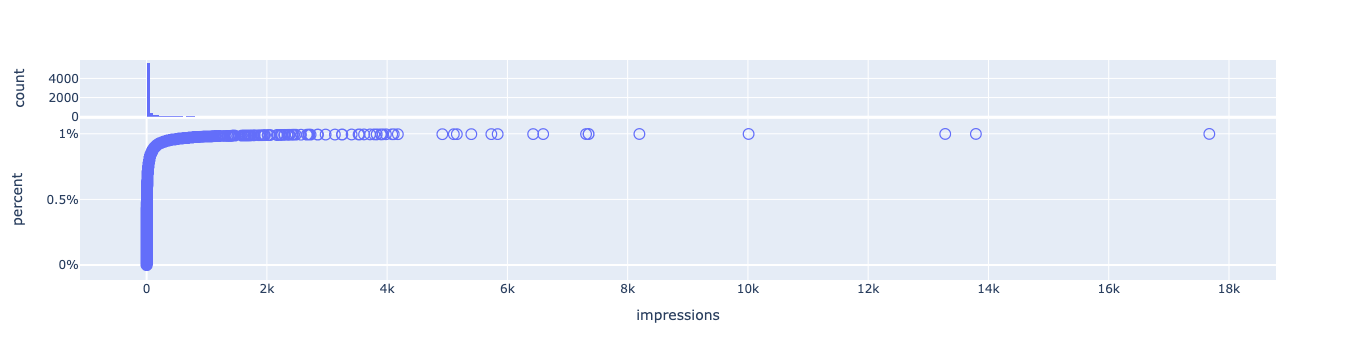

In [ ]:
ecdf(
    by_query,
    x='impressions')

### Select a column from the DataFrame to display its value on hover

In this case, we set `hover_name='query'` and now we can see which query each marker represents.

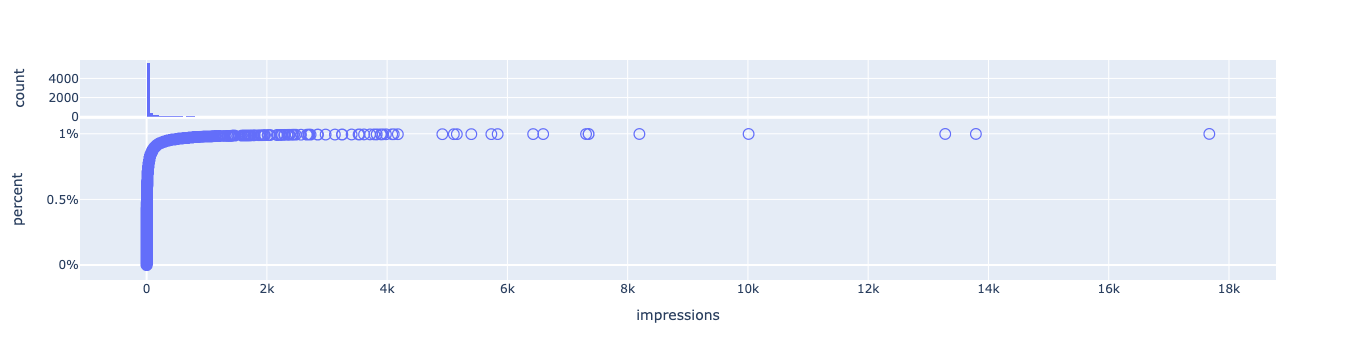

In [ ]:
ecdf(
    by_query,
    x='impressions',
    hover_name='query')#<<

Mousing over any of the circles you see the query it represents, the value represented (impressions in this case), how many other observations are equal-to or below it as a percentage, and also the counts of observations above and below.

## Publishing trends from XML sitemaps

In [ ]:
brighton = pd.read_csv('data/brightonseo_sitemap.csv', parse_dates=['lastmod'])
brighton['segment'] = '/' + brighton['segment'] + '/'
brighton.head()

loc                   lastmod  \
0                           https://brightonseo.com 2024-04-29 10:03:31+00:00   
1         https://brightonseo.com/ssas-october-2024 2024-05-15 12:43:37+00:00   
2                  https://brightonseo.com/training 2024-05-26 20:48:41+00:00   
3  https://brightonseo.com/measurefest-october-2024 2024-05-24 13:27:10+00:00   
4              https://brightonseo.com/mailing-list 2023-09-07 10:56:08+00:00   

                               sitemap  sitemap_size_mb  \
0  https://brightonseo.com/sitemap.xml         0.149905   
1  https://brightonseo.com/sitemap.xml         0.149905   
2  https://brightonseo.com/sitemap.xml         0.149905   
3  https://brightonseo.com/sitemap.xml         0.149905   
4  https://brightonseo.com/sitemap.xml         0.149905   

                      download_date scheme           netloc  \
0  2024-06-08 19:15:35.969506+00:00  https  brightonseo.com   
1  2024-06-08 19:15:35.969506+00:00  https  brightonseo.com   
2  2024-06-08 19:15:35.969506+00:00  https  brightonseo.com   
3  2024-06-08 19:15:35.969506+00:00  https  brightonseo.com   
4  2024-06-08 19:15:35.969506+00:00  https  brightonseo.com   

                        path  query  fragment                     dir_1 dir_2  \
0                        NaN    NaN       NaN                       NaN   NaN   
1         /ssas-october-2024    NaN       NaN         ssas-october-2024   NaN   
2                  /training    NaN       NaN                  training   NaN   
3  /measurefest-october-2024    NaN       NaN  measurefest-october-2024   NaN   
4              /mailing-list    NaN       NaN              mailing-list   NaN   

  dir_3 dir_4                  last_dir   segment  
0   NaN   NaN                       NaN  /Others/  
1   NaN   NaN         ssas-october-2024  /Others/  
2   NaN   NaN                  training  /Others/  
3   NaN   NaN  measurefest-october-2024  /Others/  
4   NaN   NaN              mailing-list  /Others/

Let's do the same with URLs in an XML sitemap. We can visualize the cumulative distribution of the `loc` tags, and give it more context by showing each URL when we mouseover.
This becomes a rich report with a lot of data on each URL.

We can immediately see in the above chart that the content on this website spans the period September 2023 - June 2024. We can clearly see that most updates happened in the first periods by looking at the top histogram.

When we have a vertically looking set of dots, we know that there were many updates happening in a very short period of time. These are likely being updated in a batch.

With a simple option we can split and color the chart by the website segment.

I took the top five values in `/dir_1/` and labelled all other values as "Others".

By using `facet_row="segment"` we have six charts showing us the trend for each segment of the website separately.

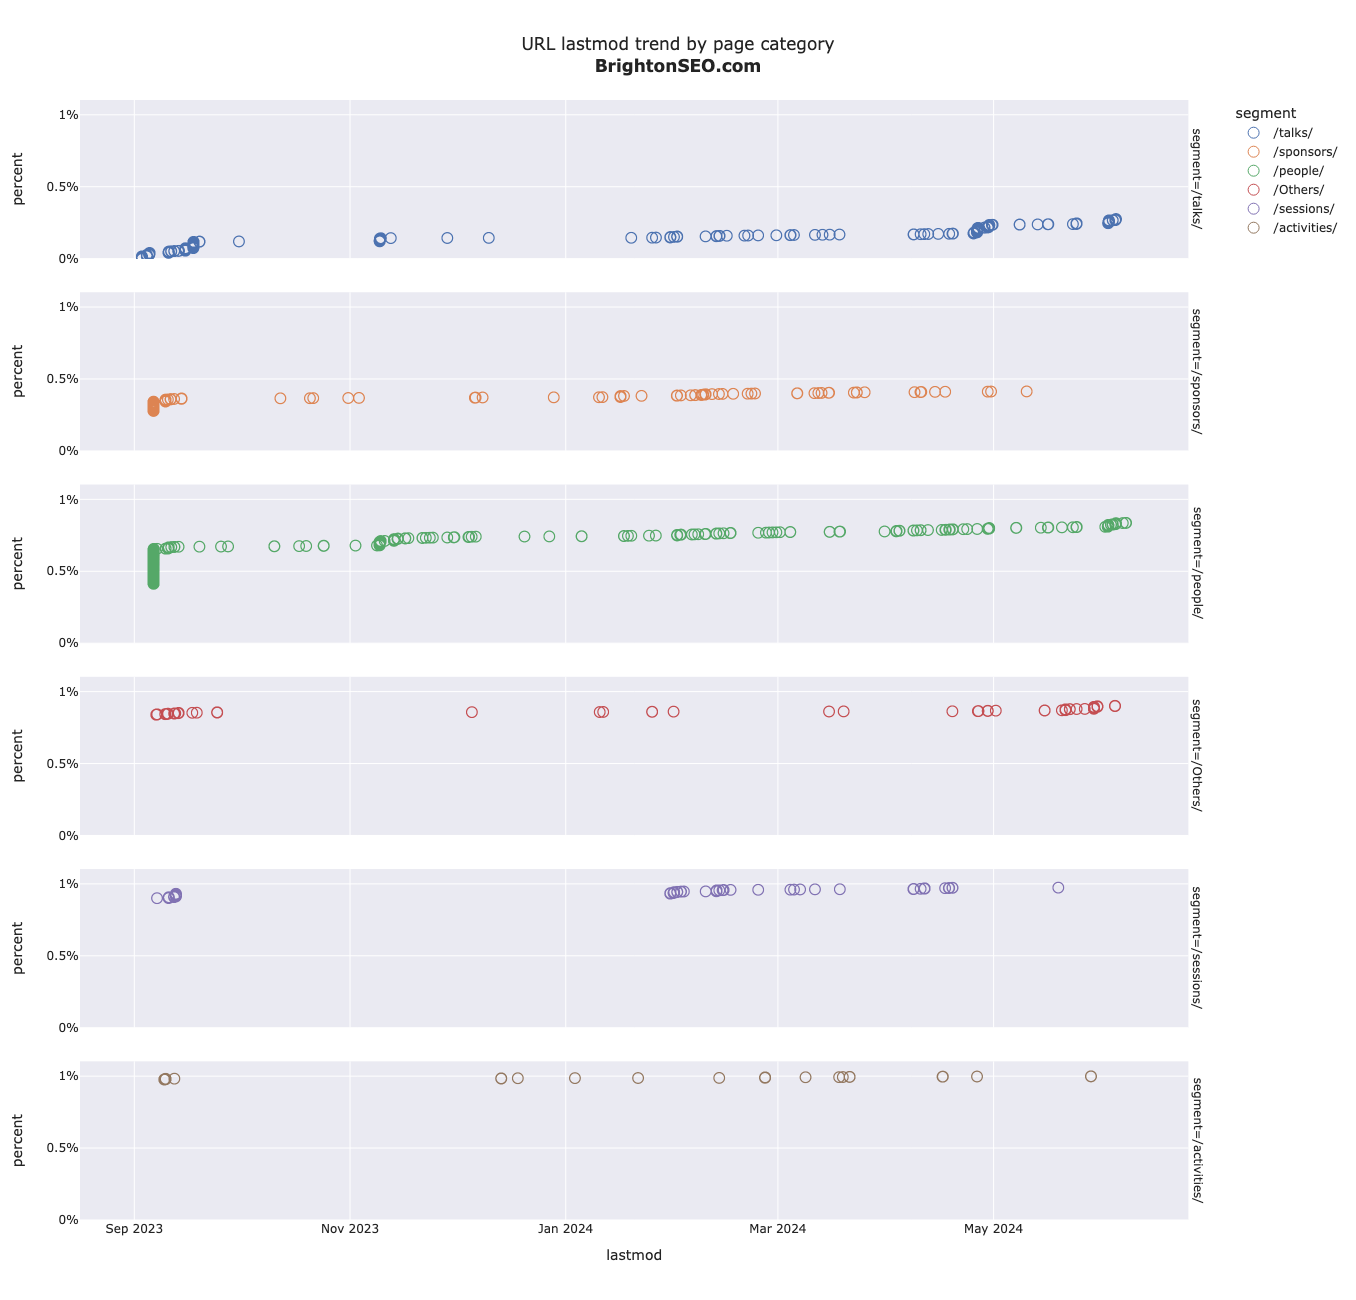

In [ ]:
ecdf(
    brighton,
    x='lastmod',
    height=1300,
    hover_name='loc',
    template='seaborn',
    facet_row='segment',#<<
    color='segment',#<<
    title='URL lastmod trend by page category<br><b>BrightonSEO.com</b>')

## Visualizing clustered/classified keywords

The same applies to keywords, as it is crucial to know how they are distributed. We can also gain more insight after categorizing the keywords and applying the same technique we applied in the previous example.

In [ ]:
photography = pd.read_csv('data/photgraphy_keywords.csv')
photography

keyword  volume  \
0    instagram landscape dimensions    1600   
1    instagram profile picture size    4700   
2                  inches to pixels   14000   
3                   profile picture   74000   
4           how to make a watermark    1900   
..                              ...     ...   
590          eharmony blurry photos      20   
591                    booed images      30   
592    how to make a good checklist      30   
593                picmonkey coupon      30   
594      printable garage sale sign      20   

                               category  
0    Social Media and Digital Platforms  
1    Social Media and Digital Platforms  
2                   Design and Graphics  
3         Photography and Image Editing  
4                   Design and Graphics  
..                                  ...  
590       Photography and Image Editing  
591       Photography and Image Editing  
592               Ideas and Inspiration  
593                                 NaN  
594                 Design and Graphics  

[595 rows x 3 columns]

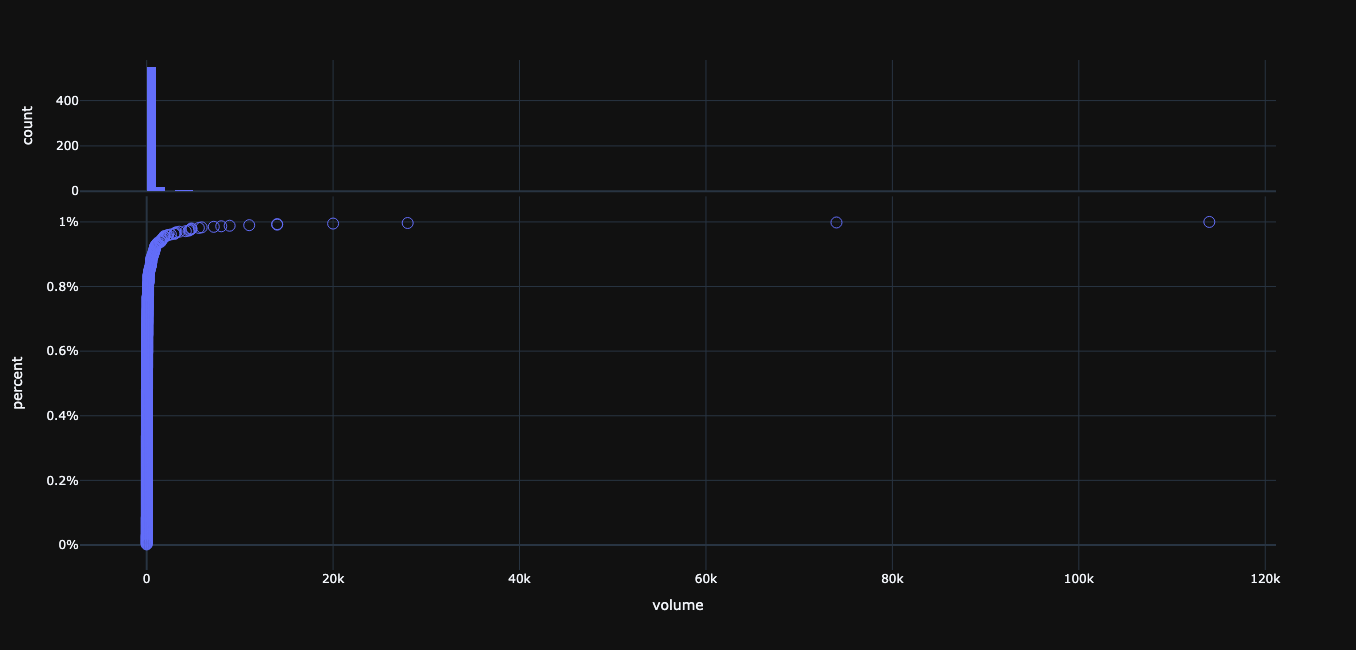

In [ ]:
ecdf(
    photography,
    x='volume',
    hover_name='keyword',
    height=650,
    template='plotly_dark')

## Visualizing keywords split by category

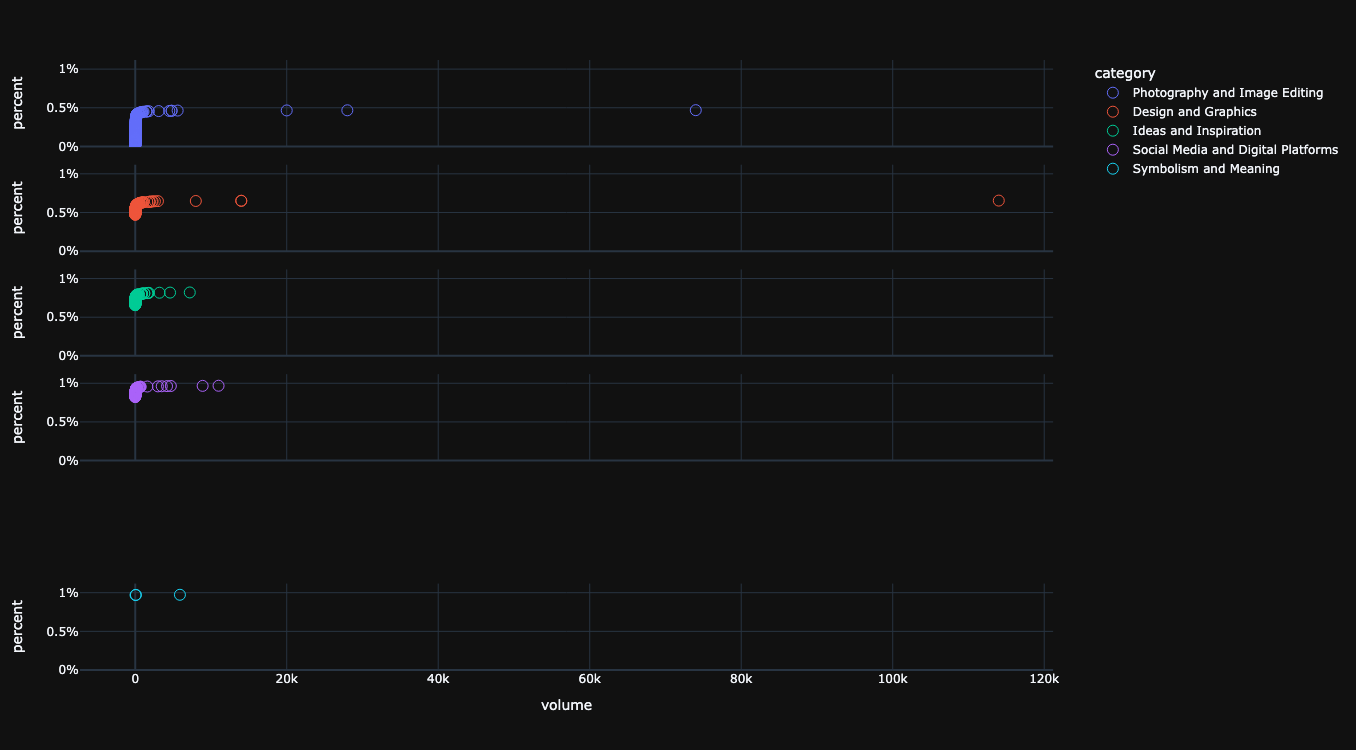

In [ ]:
fig = ecdf(
    photography,
    x='volume',
    hover_name='keyword',
    height=750,
    template='plotly_dark',
    facet_row='category',#<<
    color='category')#<<
for annotation in fig.layout.annotations:
    annotation.text = ''
fig

## GSC queries - by device

In [ ]:
nba = pd.read_csv('data/nba_keywords.csv')
nba.head()

query   device  impressions
0      larry bird stats   Mobile          215
1   stephen curry stats  Desktop          209
2  michael jordan stats  Desktop          197
3      larry bird stats  Desktop          174
4     kobe bryant stats  Desktop          129

## Groupby queries and visualize impressions

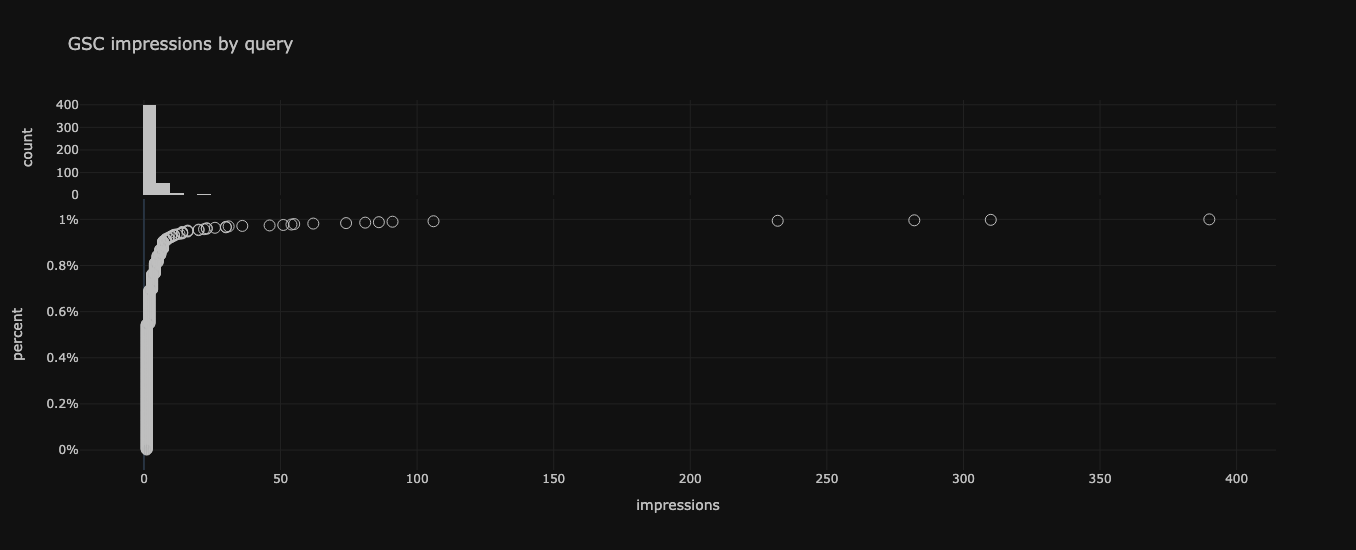

In [ ]:
fig = ecdf(
    nba.groupby('query')['impressions'].sum().reset_index(),
    x='impressions',
    title='GSC impressions by query',
    height=550,
    template='plotly_dark',
    hover_name='query')
# optional, just to demonstrate styling options
fig.data[0].marker.color = 'silver'
fig.data[1].marker.color = 'silver'
fig.layout.font.color = 'silver'
fig.update_xaxes(gridcolor='#222222')
fig.update_yaxes(gridcolor='#222222')
fig.layout.yaxis.zeroline = False
fig.layout.yaxis2.zeroline = False
fig

## GSC queries - by device

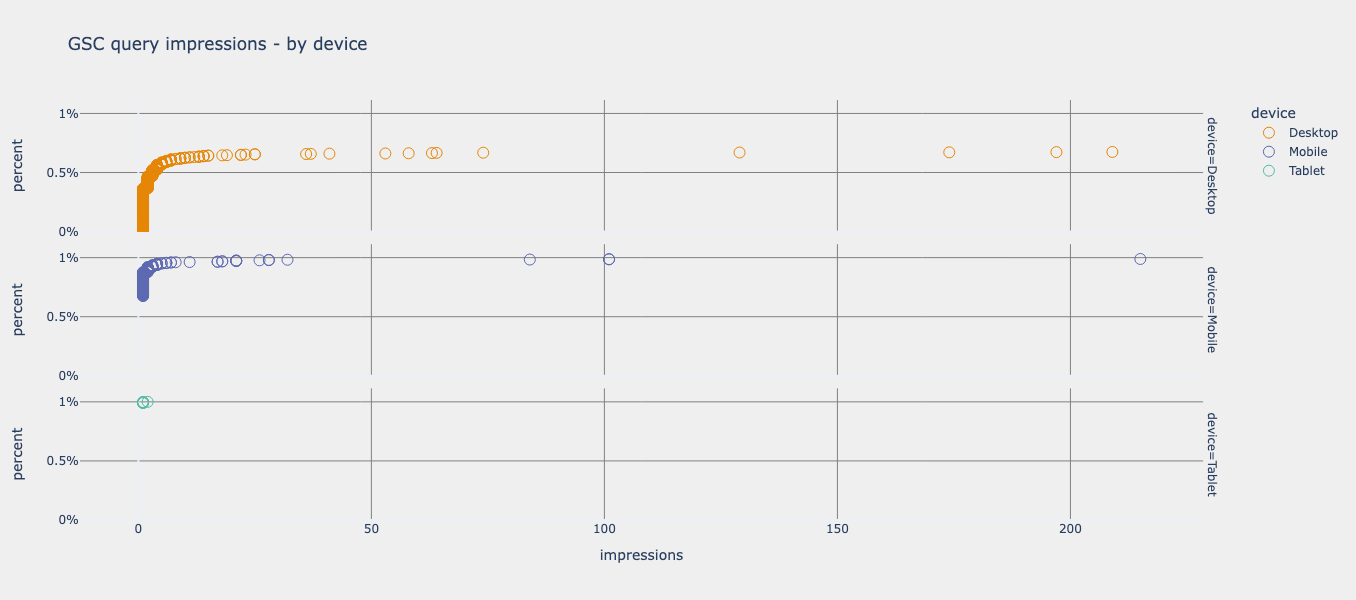

In [ ]:
fig = ecdf(
    nba,
    x='impressions',
    template='plotly_white',
    facet_row='device',#<<
    color='device',#<<
    hover_name='query',
    height=600,
    color_discrete_sequence=px.colors.qualitative.Vivid,
    title='GSC query impressions - by device')
# optional, just to demonstrate styling options
fig.layout.paper_bgcolor = '#efefef'
fig.layout.plot_bgcolor = '#efefef'
fig.update_xaxes(gridcolor='gray')
fig.update_yaxes(gridcolor='gray')
fig

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()